## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
%matplotlib inline

In [2]:
import os

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
DATADIR = "wave_data/"

## Introduction

Vous trouverez dans le répertoire `wave_data/` des signaux qui ont été générés pour l'exercice, nous allons vous demander de faire quelques manipulations afin de lire, transformer, analyser, etc.

Le but de cet exercice est simplement de valider que vous êtes en mesure de prendre rapidement en main python si vous devez rejoindre l'équipe. Il s'agit principalement de faire appel à des fonctions et des modules que nous utilisons régulièrement.

Si vous n'avez jamais fait de python, vous pouvez facilement trouver des éléments de réponses sur internet, et écrire du code fonctionnel.

Une fois le notebook rempli, il ne vous reste plus qu'à nous le renvoyer par email à l'adresse : albenhenni@dataswati.com.

## import et visualisation du code

** Ouvrir un des fichiers du répertoire wave_data à l'aide de `numpy` via la fonction `genfromtxt`**

In [5]:
signal1 = np.genfromtxt(DATADIR+'signal_1.txt')

signals = np.zeros((100,200))
for i in range(1,101): signals[i-1]=np.genfromtxt(DATADIR+'signal_'+str(i)+'.txt')

** Former une liste de tous les signaux issus des fichiers du repertoire wave_data au format `numpy.array`.**

** Former une seconde liste de même longueur, contenant le numéro de fichiers au format entier (le numéro étant x dans  signal_x.txt). **

Bien évidement les listes devront correpondre, pour se faire nous conseillon l'utilisation de boucle `for` de `os.listdir` et des méthode asscocié au format `str` tel que `str.split`.

** Afficher quelques plots des signaux en utilisant `matplotlib` (`plt.plot`) **

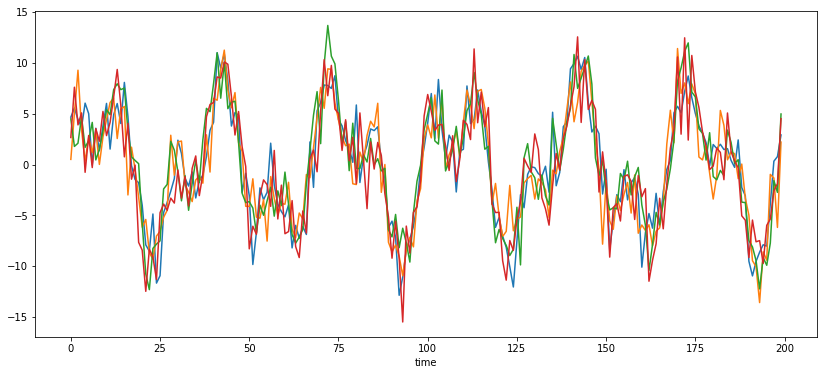

In [9]:
plt.figure(figsize=(14,6))
for i in [0,10,26,38]: plt.plot(signals[i])
plt.xlabel('time')


## Pretraitement et featuring

**Apres avoir converti la liste en un array de taille (nb_sample, nb_feature), normaliser les signaux en utilisant `MinMaxScaler` de `scikit-learn`**

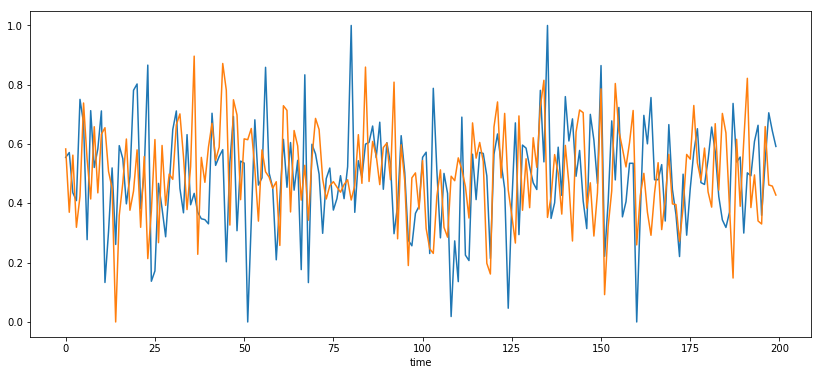

In [10]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaler.fit(signals)
signals_norm = scaler.transform(signals)
plt.figure(figsize=(14,6))
for i in [0,1]: plt.plot(signals_norm[i])
plt.xlabel('time')

**Expliquer ce que fait la fonction.**

** Representer graphiquement avec `plot` quelques courbes de resultat, cela vous parait il correct? Ce resultat vous parait-il adequat?**

La fonction MinMaxScaler reéchelle chaque feature independement par rapport aux valeurs maximale et minimale de ce feature

**Appliquer la fonction écrite ci-dessous à notre set de données.
Ploter quelques resultats.**

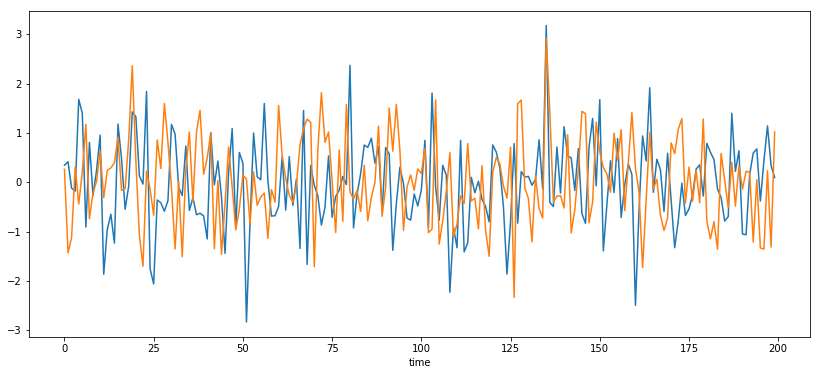

In [11]:
scaler_std = StandardScaler()
scaler_std.fit(signals)
signals_std = scaler_std.transform(signals)
plt.figure(figsize=(14,6))
for i in [0,26]: plt.plot(signals_std[i])
plt.xlabel('time')

**Expliquer la différence avec la méthode précédente**

La méthode StandardScaler normalise les données de façon à ce que la valeur moyenne soit zero est la déviation standard soit égale à 1.

**Récupérer les vecteurs amplitudes et fréquences associées en appliquant une FFT sur le signal normé avec la seconde méthode (on considère que la fréquence d'échantillonnage vaut 100 Hz)**


aidez vous du module `fft` de `numpy`

In [14]:
fft_signals = np.fft.fft(signals_std,norm='ortho')
freq_signals = np.fft.fftfreq(n=200, d=0.01)
amplitude = np.abs(fft_signals)


**Faire un plot du spectre FFT.**

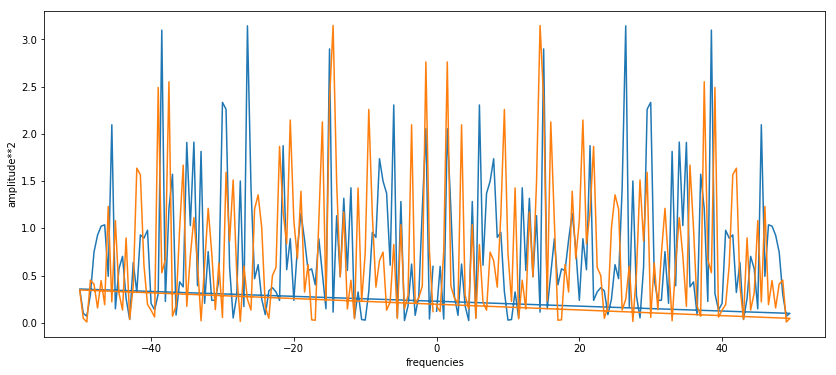

In [18]:
plt.figure(figsize=(14,6))
for i in [0,26]: plt.plot(freq_signals[:],amplitude[i]**2)
plt.xlabel('frequencies')
plt.ylabel('amplitude**2')

## Reduction de dimension
On cherche maintenant à reduire le nombre de dimension de feature afin d'améliorer les futures procédures d'apprentissage.

**Réduire le nombre de features à 20 par signal**

(nous voulons que chaque nouvelle feature soit la moyenne de plusieurs amplitudes de frequences proches.

In [16]:
from sklearn.decomposition import PCA

**appliquer la PCA aux spectres FFT pour reduire le nombre de feature à 20 **

(nous vous conseillons l'utlisation de la classe PCA de scikit-learn)

In [17]:
pca = PCA(n_components=20)
pca.fit(amplitude)
pca_amplitude = pca.transform(amplitude)


## Detection d'anomalie
Nous allons maintenant chercher à détecter les signaux anormaux du dataset(et oui il y a en a). Ceci correspond à un apprentissage non supervisé. Nous vous conseillons d'explorer le lien ci-dessous.

http://scikit-learn.org/stable/modules/outlier_detection.html
Si vous êtes perdu ou ne savez pas par quoi commencer, nous recommandons d'essayer OneClassSVM ou IsolationForest.

Si vous souhaitez proposer et illustrer une autre méthode, n'hésitez pas et faites vous plaisir.

In [40]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest


** Appliquer les differents outils d'outlier detection aux differentes données normées (brut ou fft avec ou sans reduction de dimensions) **

1) OneClassSVM

In [64]:
# Données brutes normées avec MinMaxScaler
onesvm = OneClassSVM()
onesvm.fit(signals_norm)
detection_a = onesvm.predict(signals_norm)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_a) if x == -1])

Anomalous time series are  [4, 6, 8, 9, 10, 11, 14, 18, 21, 26, 28, 29, 36, 39, 43, 46, 47, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 81, 83, 84, 85, 89, 90, 95, 96]


In [65]:
#Données brutes normées avec StandardScaler
onesvm = OneClassSVM()
onesvm.fit(signals_std)
detection_std = onesvm.predict(signals_std)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_std) if x == -1])


outliers  [3, 4, 6, 10, 11, 12, 18, 19, 21, 22, 24, 26, 29, 35, 36, 38, 39, 47, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 83, 85, 89, 90, 96]


In [66]:
#Amplitude des signaux de la FFT
onesvm = OneClassSVM()
onesvm.fit(amplitude)
detection_fft = onesvm.predict(amplitude)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_fft) if x == -1])


outliers  [8, 9, 10, 11, 12, 15, 16, 17, 19, 22, 23, 26, 28, 38, 39, 44, 47, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 81, 83, 84, 88, 89, 92, 95, 100]


In [69]:
#Principal components analysis des amplitudes
onesvm = OneClassSVM(gamma=0.1)
onesvm.fit(pca_amplitude)
detection_pca = onesvm.predict(pca_amplitude)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_pca) if x == -1])


Anomalous time series are  [3, 4, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 21, 23, 26, 31, 39, 40, 43, 44, 45, 46, 51, 53, 56, 57, 60, 63, 64, 65, 66, 69, 70, 71, 72, 73, 75, 79, 84, 86, 89, 90, 94, 96, 100]


2) IsolationForest

In [68]:
#Données brutes normées avec Min MaxScaler
isforest = IsolationForest(n_estimators=20)
isforest.fit(signals_norm)
detection_a = isforest.predict(signals_norm)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_a) if x == -1])

Anomalous time series are  [52, 55, 57, 63, 65, 68, 69, 70, 73, 75]


In [70]:
#Données brutes normées avec StandardScaler
isforest = IsolationForest(n_estimators=20)
isforest.fit(signals_std)
detection_b = isforest.predict(signals_std)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_b) if x == -1])

Anomalous time series are  [51, 52, 58, 63, 64, 68, 69, 70, 72, 74]


In [74]:
#Amplitudes des signaux  (FFT)
isforest = IsolationForest(n_estimators=40)
isforest.fit(amplitude)
detection_c = isforest.predict(amplitude)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_c) if x == -1])

Anomalous time series are  [10, 28, 33, 39, 44, 51, 62, 65, 70, 79]


In [139]:
#Principal components analysis des amplitudes
outliers=[]
for i in range(0,20):
    isforest = IsolationForest(n_estimators=20)
    isforest.fit(pca_amplitude)
    detection = isforest.predict(pca_amplitude)
    for l in [i+1 for i,x in enumerate(detection) if x == -1]: 
        if l not in outliers: outliers.append(l)

** Proposer une liste de signaux anormaux **

In [140]:
print("Anomalous time series are ", sorted(outliers))

Anomalous time series are  [4, 5, 10, 11, 18, 19, 21, 23, 26, 27, 28, 29, 38, 39, 41, 44, 47, 51, 54, 57, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 78, 79, 81, 83, 84, 89, 91, 92, 95, 100]


## Autoencoder (Pour les motivés)
Il existe une méthode de compression de données en Deep learning qui contrairement à la PCA permet d'extraire des données non lineaires. Ci-dessous des exemples de codes écrits en keras.

https://blog.keras.io/building-autoencoders-in-keras.html

**Proposer un autencoder appliqué à nos données**

** Proposer une methode de detection d'anomalie basée sur un autoencoder **

# n'hésitez pas à rajouter tout code succeptible de nous impressionner